# Análisis de incidentes viales en la ciudad de México.

La ciudad de México es una de las ciudades mas pobladas del mundo donde la vialidad automovilistica provoca grandes problemas.

El objetivo de este analizis es poder prevenir accidentes viales y disminuir las consecuencias que estos pueden tener con base a las fechas, horas, localizacion y delegaciones donde sucedieron accidentes en los ultimos 4 años en la ciudad de México.

Estos datos fueron recopilados del portal de datos de la ciudad de México:https://datos.cdmx.gob.mx/explore/dataset/incidentes-viales-c5/table/


## Primero cargamos los datos

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('incidentes-viales-c5.csv', sep=";")
data.head()


,Column 1,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint
0,23898.0,C4/140226/01683,26/02/2014,13:46:38,Miércoles,(A) La unidad de atención a emergencias fue de...,26/02/2014,2014,Febrero,13:59:23,MILPA ALTA,lesionado-accidente automovilístico,19.19003,-99.02313,URGENCIAS MEDICAS,LLAMADA DEL 066,MILPA ALTA,"19.19003,-99.02313"
1,153067.0,C4/141127/02509,27/11/2014,16:22:58,Jueves,(A) La unidad de atención a emergencias fue de...,27/11/2014,2014,Noviembre,16:27:16,ALVARO OBREGON,accidente-choque sin lesionados,19.39375,-99.20745,EMERGENCIA,LLAMADA DEL 066,ALVARO OBREGON,"19.39374999,-99.20745"
2,174851.0,C4/150112/01615,12/01/2015,13:05:16,Lunes,(N) La unidad de atención a emergencias fue de...,12/01/2015,2015,Enero,13:16:13,BENITO JUAREZ,accidente-choque sin lesionados,19.39142,-99.15100,EMERGENCIA,LLAMADA DEL 066,BENITO JUAREZ,"19.39141998,-99.15099984"
3,153123.0,C4/141127/02902,27/11/2014,17:54:17,Jueves,(N) La unidad de atención a emergencias fue de...,27/11/2014,2014,Noviembre,18:16:29,TLALPAN,accidente-choque sin lesionados,19.29207,-99.14387,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.29206997,-99.14387004"
4,174882.0,C4/150112/01619,12/01/2015,13:06:10,Lunes,(A) La unidad de atención a emergencias fue de...,12/01/2015,2015,Enero,13:10:13,MIGUEL HIDALGO,accidente-choque sin lesionados,19.43827,-99.16869,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.43827002,-99.16868988"


In [23]:
data.shape

(1183101, 18)

### Tenemos 1183101 registros, pero ahora limpiaremos un poco los datos que tenemos...

In [24]:
data.drop(['Column 1'], axis='columns', inplace=True)

In [25]:
data.head()

,folio,fecha_creacion,hora_creacion,dia_semana,codigo_cierre,fecha_cierre,año_cierre,mes_cierre,hora_cierre,delegacion_inicio,incidente_c4,latitud,longitud,clas_con_f_alarma,tipo_entrada,delegacion_cierre,geopoint
0,C4/140226/01683,26/02/2014,13:46:38,Miércoles,(A) La unidad de atención a emergencias fue de...,26/02/2014,2014,Febrero,13:59:23,MILPA ALTA,lesionado-accidente automovilístico,19.19003,-99.02313,URGENCIAS MEDICAS,LLAMADA DEL 066,MILPA ALTA,"19.19003,-99.02313"
1,C4/141127/02509,27/11/2014,16:22:58,Jueves,(A) La unidad de atención a emergencias fue de...,27/11/2014,2014,Noviembre,16:27:16,ALVARO OBREGON,accidente-choque sin lesionados,19.39375,-99.20745,EMERGENCIA,LLAMADA DEL 066,ALVARO OBREGON,"19.39374999,-99.20745"
2,C4/150112/01615,12/01/2015,13:05:16,Lunes,(N) La unidad de atención a emergencias fue de...,12/01/2015,2015,Enero,13:16:13,BENITO JUAREZ,accidente-choque sin lesionados,19.39142,-99.15100,EMERGENCIA,LLAMADA DEL 066,BENITO JUAREZ,"19.39141998,-99.15099984"
3,C4/141127/02902,27/11/2014,17:54:17,Jueves,(N) La unidad de atención a emergencias fue de...,27/11/2014,2014,Noviembre,18:16:29,TLALPAN,accidente-choque sin lesionados,19.29207,-99.14387,EMERGENCIA,LLAMADA DEL 066,TLALPAN,"19.29206997,-99.14387004"
4,C4/150112/01619,12/01/2015,13:06:10,Lunes,(A) La unidad de atención a emergencias fue de...,12/01/2015,2015,Enero,13:10:13,MIGUEL HIDALGO,accidente-choque sin lesionados,19.43827,-99.16869,EMERGENCIA,LLAMADA DEL 066,MIGUEL HIDALGO,"19.43827002,-99.16868988"


In [26]:
data.shape

(1183101, 17)

In [27]:
data.count()

folio                1183101
fecha_creacion       1183101
hora_creacion        1183101
dia_semana           1183101
codigo_cierre        1183101
fecha_cierre         1183101
año_cierre           1183101
mes_cierre           1183101
hora_cierre          1183101
delegacion_inicio    1182958
incidente_c4         1183101
latitud              1182659
longitud             1182667
clas_con_f_alarma    1183101
tipo_entrada         1183101
delegacion_cierre    1182976
geopoint             1182656
dtype: int64

### Reviso los datos nulos

In [28]:
col_names = data.columns.tolist()

for column in col_names:
    print ("Valores nulos en <{0}>: {1}".format(column, data[column].isnull().sum()))

Valores nulos en <folio>: 0
Valores nulos en <fecha_creacion>: 0
Valores nulos en <hora_creacion>: 0
Valores nulos en <dia_semana>: 0
Valores nulos en <codigo_cierre>: 0
Valores nulos en <fecha_cierre>: 0
Valores nulos en <año_cierre>: 0
Valores nulos en <mes_cierre>: 0
Valores nulos en <hora_cierre>: 0
Valores nulos en <delegacion_inicio>: 143
Valores nulos en <incidente_c4>: 0
Valores nulos en <latitud>: 442
Valores nulos en <longitud>: 434
Valores nulos en <clas_con_f_alarma>: 0
Valores nulos en <tipo_entrada>: 0
Valores nulos en <delegacion_cierre>: 125
Valores nulos en <geopoint>: 445


### Como los datos nulos son pocos comparados con la cantidad total de registros, decidí eliminar todos los registros que contengan datos nulos

In [30]:
dataC=data.dropna()

In [31]:
dataC.count()

folio                1182513
fecha_creacion       1182513
hora_creacion        1182513
dia_semana           1182513
codigo_cierre        1182513
fecha_cierre         1182513
año_cierre           1182513
mes_cierre           1182513
hora_cierre          1182513
delegacion_inicio    1182513
incidente_c4         1182513
latitud              1182513
longitud             1182513
clas_con_f_alarma    1182513
tipo_entrada         1182513
delegacion_cierre    1182513
geopoint             1182513
dtype: int64

In [32]:
col_names = dataC.columns.tolist()

for column in col_names:
    print ("Valores nulos en <{0}>: {1}".format(column, dataC[column].isnull().sum()))

Valores nulos en <folio>: 0
Valores nulos en <fecha_creacion>: 0
Valores nulos en <hora_creacion>: 0
Valores nulos en <dia_semana>: 0
Valores nulos en <codigo_cierre>: 0
Valores nulos en <fecha_cierre>: 0
Valores nulos en <año_cierre>: 0
Valores nulos en <mes_cierre>: 0
Valores nulos en <hora_cierre>: 0
Valores nulos en <delegacion_inicio>: 0
Valores nulos en <incidente_c4>: 0
Valores nulos en <latitud>: 0
Valores nulos en <longitud>: 0
Valores nulos en <clas_con_f_alarma>: 0
Valores nulos en <tipo_entrada>: 0
Valores nulos en <delegacion_cierre>: 0
Valores nulos en <geopoint>: 0


## Ahora podemos ver información de nuestro datos

Primero analizaremos los accidentes que suceden en las diferentes delegaciones de la ciudad de México...

In [14]:
accidentes_por_delegacion = dataC.delegacion_inicio.value_counts()
accidentes_por_delegacion

IZTAPALAPA             188882
GUSTAVO A. MADERO      124400
CUAUHTEMOC             121231
MIGUEL HIDALGO         101919
COYOACAN                95569
BENITO JUAREZ           90069
ALVARO OBREGON          88304
VENUSTIANO CARRANZA     80072
TLALPAN                 72545
AZCAPOTZALCO            51851
IZTACALCO               50196
XOCHIMILCO              43824
TLAHUAC                 28113
CUAJIMALPA              23033
MAGDALENA CONTRERAS     16698
MILPA ALTA               5807
Name: delegacion_inicio, dtype: int64

Ahora unas graficas con estos datos...

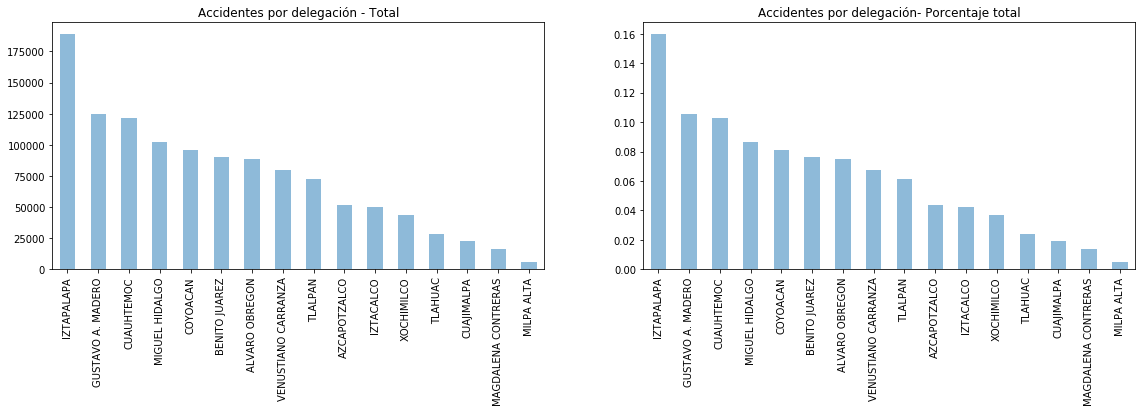

In [19]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(30,10))

ax=plt.subplot2grid((2,3), (0,0))
y_pos=dataC[""]
dataC.delegacion_inicio.value_counts().plot(kind='bar', alpha=0.5)
plt.title('Accidentes por delegación - Total')

plt.subplot2grid((2,3), (0,1))
dataC.delegacion_inicio.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title('Accidentes por delegación- Porcentaje total')
plt.show() 

Ahora vemos los accidentes que suceden por dia y lo graficamos...

In [34]:
dataC.dia_semana.value_counts()

Viernes      196422
Sábado       181157
Jueves       170031
Miércoles    167130
Martes       162634
Lunes        156807
Domingo      148332
Name: dia_semana, dtype: int64

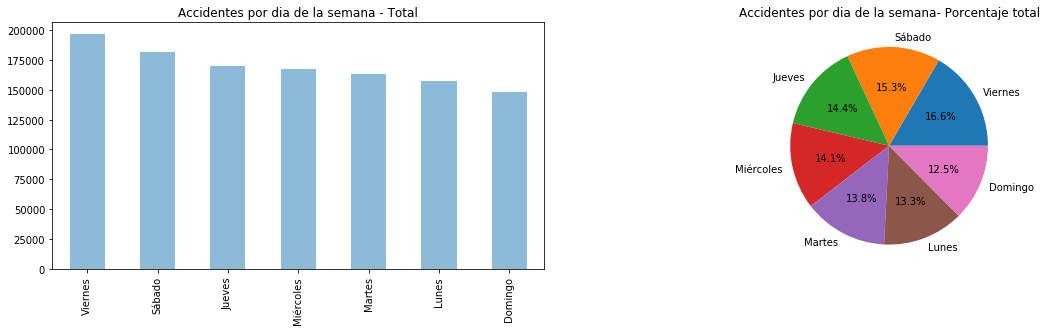

In [33]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(30,10))
plt.subplot2grid((2,3), (0,0))
dataC.dia_semana.value_counts().plot(kind='bar', alpha=0.5)
plt.title('Accidentes por dia de la semana - Total')

plt.subplot2grid((2, 3), (0,1))
dataC.dia_semana.value_counts(normalize=True).plot.pie(y='mass', autopct='%1.1f%%')
plt.title('Accidentes por dia de la semana- Porcentaje total')
plt.axis('off')
plt.show() 

Y ahora graficamos los accidentes diarios reportados...

Text(0, 0.5, 'Numbero de accidentes')

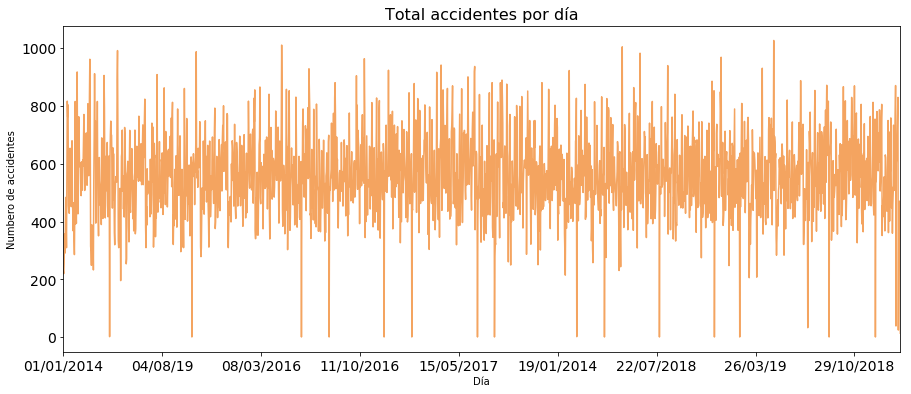

In [35]:
fechas=dataC.groupby("fecha_creacion").size()
plt.figure(figsize=(15,6))
mediaD=dataC.groupby("fecha_creacion").size().mean()
plt.tick_params(labelsize=14)
fechas.plot(label='Accidents per day', color='sandybrown')
plt.title('Total accidentes por día', fontsize=16)
plt.xlabel('Día')
plt.ylabel('Numbero de accidentes')



In [36]:
mediaD

558.5795937647614

#### Ahora seleccionamos los datos del 2018 y de diciembre del 2018 para continuar con el análisis

In [38]:
#Datos de Diciembre del 2018
data18=dataC[dataC['año_cierre'] == 2018]
data18=data18[data18['mes_cierre'] == 'Diciembre']
#Datos del 2018
data2018=dataC[dataC['año_cierre'] == 2018]


Ahora graficamos los accidentes diarios durante el 2018

Text(0, 0.5, 'Numbero de accidentes')

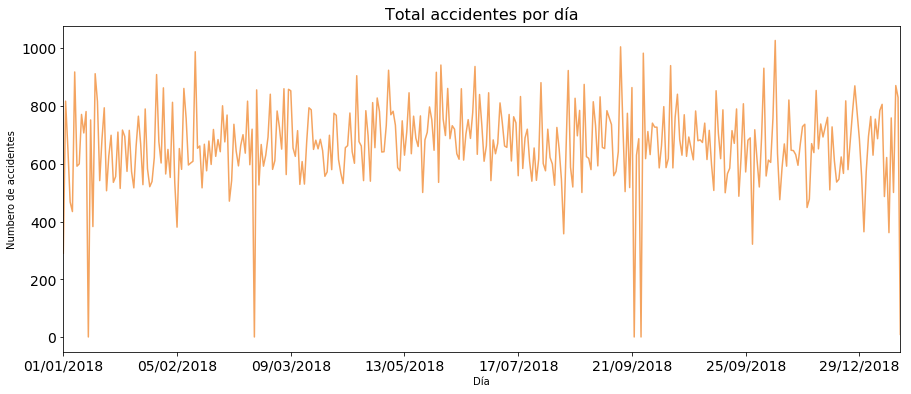

In [39]:

fechas=data2018.groupby("fecha_creacion").size()
plt.figure(figsize=(15,6))
media=data2018.groupby("fecha_creacion").size().mean()
plt.tick_params(labelsize=14)
fechas.plot(label='Accidents per day', color='sandybrown')
plt.title('Total accidentes por día', fontsize=16)
plt.xlabel('Día')
plt.ylabel('Numbero de accidentes')

In [40]:
media

665.5528455284552

#### Selecciono los datos de latitud y longitud para hacer un análisis basado en las localizaciones de los accidentes.

In [41]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Data={'lat': data18['latitud'],
      'lon': data18['longitud']
     }
df=DataFrame(Data, columns=['lat', 'lon'])
df.head()

,lat,lon
31247,19.40705,-99.07965
63035,19.31573,-99.06554
63038,19.44218,-99.21594
63046,19.33065,-99.05312
63051,19.36532,-99.20433


In [43]:
df.shape

(21607, 2)

[19.40705001 19.31572998 19.44217998 ... 19.489505   19.45781001
 19.25501004]


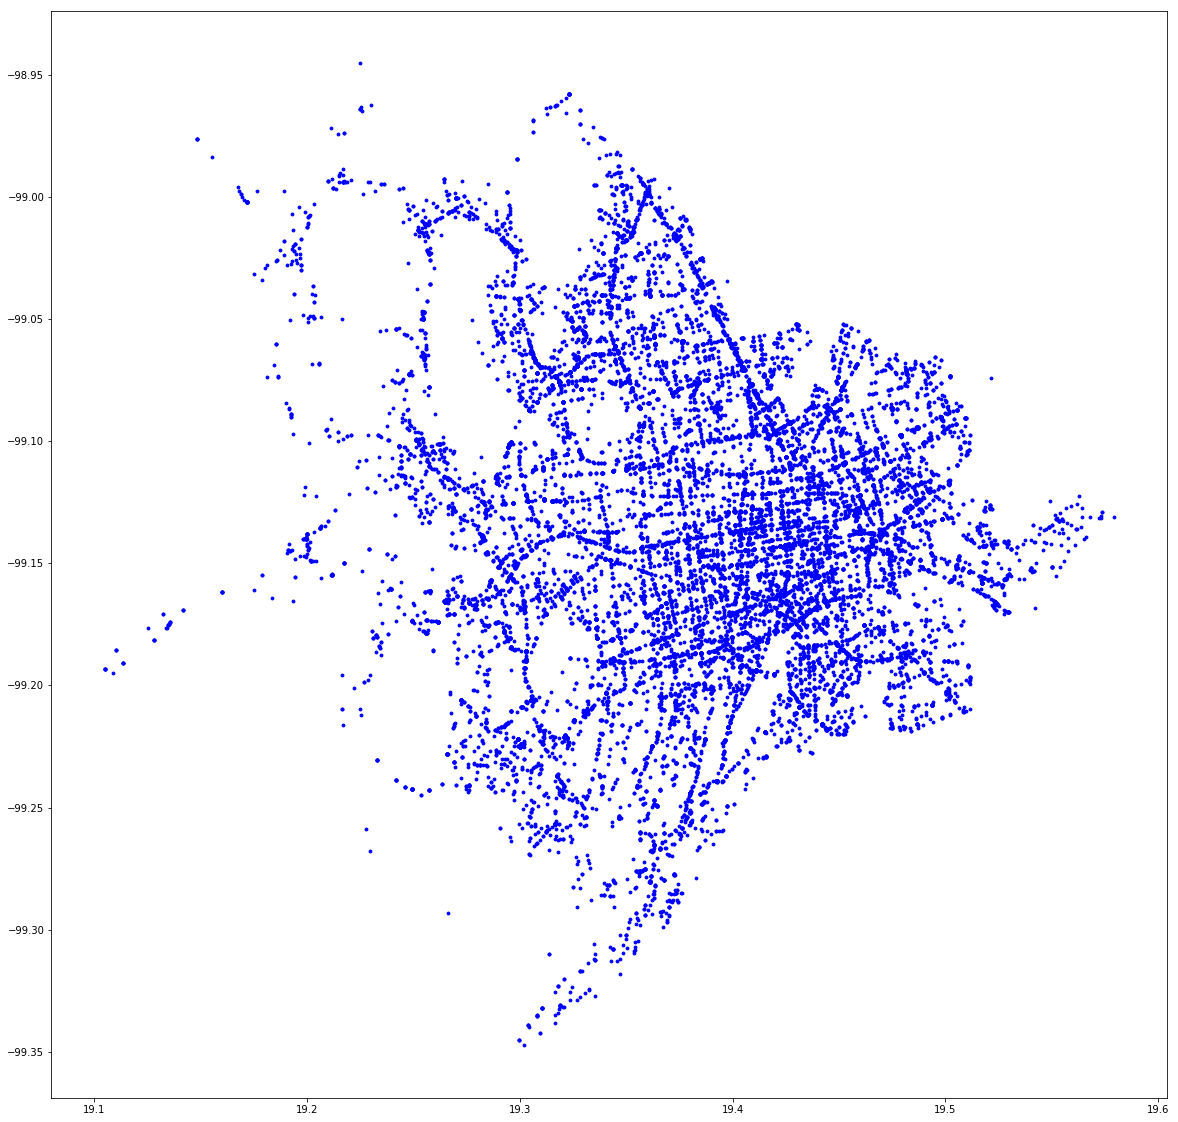

In [46]:
f1 = df['lat'].values
f2 = df['lon'].values
print(f1)
plt.figure(figsize=(20,20))
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='blue', s=8)

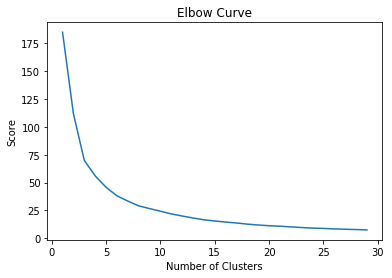

In [47]:
from sklearn.cluster import KMeans
Nc=  range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [-1*kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [49]:
k=10
# Number of clusters
kmeans = KMeans(n_clusters=k)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [56]:
print(centroids)

[[ 19.41698309 -99.14703536]
 [ 19.3492087  -99.13245199]
 [ 19.32180028 -99.24251982]
 [ 19.27383141 -99.14437286]
 [ 19.37705746 -99.19899929]
 [ 19.25948724 -99.02697998]
 [ 19.41787828 -99.08762487]
 [ 19.48482031 -99.1249768 ]
 [ 19.34539845 -99.05118124]
 [ 19.45543064 -99.1892758 ]]


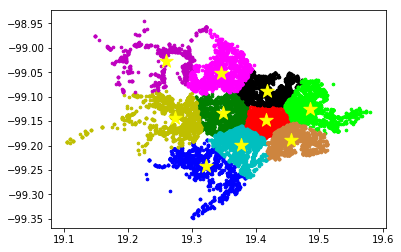

In [70]:
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'lime', 'fuchsia', 'peru']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='yellow')

In [71]:
import plotly.graph_objects as go
from matplotlib.pyplot import figure
mapbox_access_token = open("mapbox_access_token").read()

fig = go.Figure(go.Scattermapbox(
        lat=centroids[:, 0],
        lon=centroids[:, 1],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=14
        ),
        text=['Ciudad de México'],
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=19.35,
            lon=-99.15059
        ),
        pitch=0,
        
        zoom=9
        
    )
)
fig.show()
